In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import io

In [8]:
# para cargar el archivo .csv guardado localmente

from google.colab import files
uploaded = files.upload()

Saving BD Prueba tecnica.xlsx to BD Prueba tecnica.xlsx


In [12]:
pd.set_option('display.max_rows', 500)

#churn_df = pd.read_csv(io.StringIO(uploaded['BD Prueba tecnica.csv'].decode('utf-8')))
#churn_df.head()

churn_df = pd.read_excel('BD Prueba tecnica.xlsx')
churn_df

,ID,Estado Cliente al final del periodo,Churn Total,Score A,Score B,Tipo Vivienda,Zona Instalacion,Distrito,Estrato Georeferenciado,Estrato Declarado,Tipo Factura,Producto,Premium Movie,Premium HBO,Premium Adultos,Tecnologia,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Metodo de Pago Estandarizado,Antigüedad,Canal Estandarizado,Estrato Estandarizado,Score Aprobación,Score Aprobación Estandarizado,Tecnología Nexus,Revista DirecTV,Cantidad Decodificadores Total,Tipo Suscripcion,Campaña de Cobranza Actual
0,421541,A - Activo,0,NaN,19.0,D - Normal Edificio,URBANO,ORIENTE,3.0,3.0,Electronic,PLATA FULL,1,1,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,NaN,3.0,552.0,[401-600],0,0,NaN,Cross Selling,DX35_riesgo_medio_y_bajo
1,544025,A - Activo,0,NaN,NaN,N- Normal Casa,URBANO,NOROCCIDENTE,NaN,1.0,Printed,PLATA FULL,1,0,0,HD,2.0,1.0,0.0,1.0,0.0,DA - Ahorros o Cte,1.0,Dealer,NaN,448.0,[401-600],0,0,NaN,Bundle,NaN
2,562872,A - Activo,0,NaN,21.0,N- Normal Casa,URBANO,OCCIDENTE,NaN,3.0,Printed,ORO FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - Ahorros o Cte,1.0,Directo,NaN,1.0,Acierta 1,0,0,NaN,Bundle,DX35_riesgo_medio_y_bajo
3,562930,A - Activo,0,NaN,NaN,D - Normal Edificio,URBANO,BOGOTA,NaN,3.0,Printed,ORO FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,Dealer,NaN,780.0,[601-950],0,0,NaN,Only TV,NaN
4,565269,A - Activo,0,NaN,NaN,D - Normal Edificio,URBANO,BOGOTA,NaN,6.0,Printed,ORO FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,Dealer,NaN,0.0,Zona Gris,0,0,NaN,Only TV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,491544,A - Activo,0,0.000536,11.0,N- Normal Casa,URBANO,OCCIDENTE,NaN,2.0,Printed,ORO MAX,0,0,0,HD,5.0,0.0,0.0,1.0,4.0,DA - TC,8.0,Televentas,NaN,629.0,[601-950],0,0,NaN,Only TV,DX35_riesgo_medio_y_bajo
9996,4502,A - Activo,0,0.000531,24.0,N- Normal Casa,URBANO,OCCIDENTE,6.0,NaN,Electronic,ORO MAX,1,1,0,HD,5.0,3.0,0.0,1.0,1.0,INVOICE,NaN,Dealer,6.0,NaN,Sin Score,0,0,5.0,Only TV,DX35_riesgo_medio_y_bajo
9997,484915,A - Activo,0,0.000522,20.0,N- Normal Casa,URBANO,CENTRO,NaN,4.0,Printed,ORO MAX,1,1,0,HD,5.0,0.0,0.0,1.0,4.0,DA - TC,9.0,Dealer,NaN,751.0,[601-950],0,0,NaN,Only TV,DX35_riesgo_medio_y_bajo
9998,460914,A - Activo,0,0.000522,12.0,N- Normal Casa,URBANO,NORTE,NaN,2.0,Printed,ORO MAX,1,1,1,HD,5.0,0.0,0.0,1.0,4.0,INVOICE,11.0,Dealer,NaN,475.0,[401-600],0,0,5.0,Only TV,DX35_riesgo_medio_y_bajo


In [13]:
churn_df = churn_df[['Estado Cliente al final del periodo', 'Churn Total', 'Score A', 'Score B']]
churn_df['churn'] = churn_df['Churn Total'].astype('int')
churn_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Estado Cliente al final del periodo,Churn Total,Score A,Score B,churn
0,A - Activo,0,NaN,19.0,0
1,A - Activo,0,NaN,NaN,0
2,A - Activo,0,NaN,21.0,0
3,A - Activo,0,NaN,NaN,0
4,A - Activo,0,NaN,NaN,0


In [14]:
churn_df.shape

(10000, 5)

In [17]:
# información de la data (tipos de variables)
churn_df.info() 
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Estado Cliente al final del periodo  10000 non-null  object 
 1   Churn Total                          10000 non-null  int64  
 2   Score A                              9089 non-null   float64
 3   Score B                              9859 non-null   float64
 4   churn                                10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [18]:
## Calidad de los datos: total de datos faltantes ##

print(churn_df.isnull().sum())

Estado Cliente al final del periodo      0
Churn Total                              0
Score A                                911
Score B                                141
churn                                    0
dtype: int64


Se tienen 10000 registros de los cuales se desea omitir los NA primero para el score A y luego para score B. En la variable score A hay 911 faltantes y en Score B hay 141 faltantes.

In [19]:
#Summary de las variables
churn_df.describe()


,Churn Total,Score A,Score B,churn
count,10000.000000,9089.000000,9859.000000,10000.000000
mean,0.506300,0.013992,15.366670,0.506300
std,0.499985,0.012711,7.285636,0.499985
min,0.000000,0.000501,1.000000,0.000000
25%,0.000000,0.004920,11.000000,0.000000
50%,1.000000,0.010649,18.000000,1.000000
75%,1.000000,0.018873,21.000000,1.000000
max,1.000000,0.137990,24.000000,1.000000


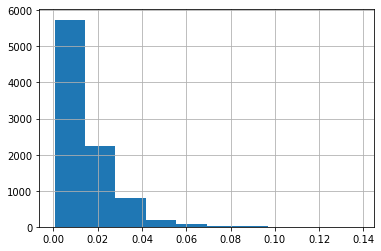

In [21]:
# Histograma de la distribución de la variable Score A
churn_df['Score A'].hist()

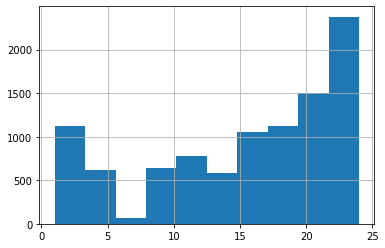

In [22]:
# Histograma de la distribución de la variable Score B
churn_df['Score B'].hist()

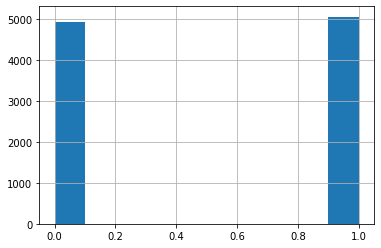

In [23]:
# Histograma de la distribución de la variable churn
churn_df['churn'].hist()

In [26]:
# Se eliminan los na del dataframe

churn_df=churn_df.dropna()

In [27]:
## Calidad de los datos: total de datos faltantes, ahora hay cero ##

print(churn_df.isnull().sum())

Estado Cliente al final del periodo    0
Churn Total                            0
Score A                                0
Score B                                0
churn                                  0
dtype: int64


In [28]:
churn_df.shape

# La base con la que se trabajará tiene 9080 registros

(9080, 5)

In [29]:
# Se coloca en un vector el score A ya limpio (sin NA)

X = np.asarray(churn_df[['Score A']])
X

array([[0.13798981],
       [0.12249928],
       [0.11771979],
       ...,
       [0.00052241],
       [0.00052241],
       [0.00050149]])

In [30]:
## La variable churn en un vector aparte:

y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 1, 0])

In [31]:
## Estandarizando la variable score A:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[9.76561308],
       [8.54575555],
       [8.16937721],
       [8.02242156],
       [7.65117146]])

In [32]:
## Separar el dataset en conjunto de prueba y entrenamiento, en una relación 80-20:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (7264, 1) (7264,)
Test set: (1816, 1) (1816,)


In [33]:
## Se ajusta un modelo de regresión logística para predecir el churn en función de score A:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
## Prediciendo con el conjunto de prueba:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [35]:
## predict_proba devuelve estimaciones para todas las clases, ordenadas por la etiqueta de clases. 1st column = P(Y=1|X), 2nd column = P(Y=0|X)

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.51306363, 0.48693637],
       [0.53790326, 0.46209674],
       [0.50226632, 0.49773368],
       ...,
       [0.31762   , 0.68238   ],
       [0.57779144, 0.42220856],
       [0.48384582, 0.51615418]])

In [36]:
## Evaluación de la precisión en la predicción mediante el índice de Jaccard

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

## Si es cercano a 1 tiene un buen ajuste

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.5776431718061674

En este caso la precisión es del 60% aproximadamente lo que no es tan bueno

In [37]:
## Matriz de Confusion

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
  
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[459 472]
 [295 590]]
[[459 472]
 [295 590]]


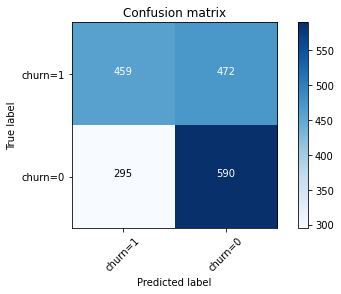

In [38]:
# Calcular la matriz de confusion
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Graficar la matriz de confusion no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize= False, title='Confusion matrix')


Si se observa la primera fila esta es para aquellos clientes cuyo valor actual de churn en el conjunto de prueba es 1, es decir, de los 1816 clientes que constituyen el conjunto de prueba, el valor del churn para 931 de ellos es 1 y de estos 931, el clasificador predijo correctamente 459 como 1 y 472 como 0.

Esto significa que para 459 clientes el valor actual del churn fue 1 en el conjunto de prueba y el clasificador predijo correctamente estos como 1; sin embargo a los 472 que clasificó como 1, el clasificador los predijo como 0, lo cual es un error.

Por otro lado, hubo 885  clientes cuyo valor de churn fue 0. El clasificador correctamente predijo 590 como 0 y 295 los clasificó erroneamente como 1, aquí el error no fue tan alto como en la clase 1.

In [39]:
# Se observa la precisión para predecir cada clase y la precisión del modelo en general

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       885
           1       0.61      0.49      0.54       931

    accuracy                           0.58      1816
   macro avg       0.58      0.58      0.58      1816
weighted avg       0.58      0.58      0.57      1816



In [40]:
## Log loss: mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6796661146570384

Mejoró la precisión a un 68%

In [41]:
## Se corre el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, use diferentes valores de __solver__ y __regularization__ values:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.05, solver='lbfgs').fit(X_train, y_train)
LR

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
## Predicting using the test set:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 1, 0, 1])

In [43]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.51, 0.49],
       [0.54, 0.46],
       [0.5 , 0.5 ],
       ...,
       [0.31, 0.69],
       [0.58, 0.42],
       [0.48, 0.52]])

In [44]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.579295154185022

Dieron practicamente los mismos resultados

Confusion matrix, without normalization
[[462 469]
 [295 590]]
[[462 469]
 [295 590]]


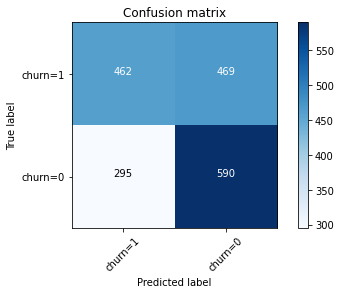

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [46]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.56      0.67      0.61       885
           1       0.61      0.50      0.55       931

    accuracy                           0.58      1816
   macro avg       0.58      0.58      0.58      1816
weighted avg       0.58      0.58      0.58      1816



In [47]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6800746731855881

La precisión sigue dando 68%

Se repite todo el mismo proceso pero para Score B

In [48]:
# Se coloca en un vector el score B ya limpio (sin NA)

X = np.asarray(churn_df[['Score B']])
X

array([[17.],
       [ 1.],
       [21.],
       ...,
       [20.],
       [12.],
       [15.]])

In [49]:
## La variable churn en un vector aparte:

y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 1, 0])

In [51]:
## Separar el dataset en conjunto de prueba y entrenamiento, en una relación 80-20:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (7264, 1) (7264,)
Test set: (1816, 1) (1816,)


In [52]:
## Se ajusta un modelo de regresión logística para predecir el churn en función de score A:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
## Prediciendo con el conjunto de prueba:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0])

In [54]:
## predict_proba devuelve estimaciones para todas las clases, ordenadas por la etiqueta de clases. 1st column = P(Y=1|X), 2nd column = P(Y=0|X)

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66, 0.34],
       [0.6 , 0.4 ],
       [0.56, 0.44],
       ...,
       [0.56, 0.44],
       [0.35, 0.65],
       [0.64, 0.36]])

In [55]:
## Evaluación de la precisión en la predicción mediante el índice de Jaccard

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

## Si es cercano a 1 tiene un buen ajuste

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6365638766519823

Mejoró el ajuste con respecto al score A, aqui dió una precisión del 64%, mientras que en score A dió 58%

In [56]:
## Matriz de Confusion

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
  
  """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")
      
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
  print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[533 398]
 [262 623]]
[[533 398]
 [262 623]]


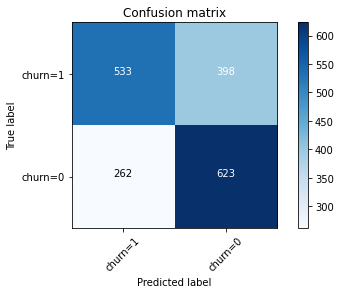

In [57]:
# Calcular la matriz de confusion
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Graficar la matriz de confusion no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize= False, title='Confusion matrix')


Si se observa la primera fila esta es para aquellos clientes cuyo valor actual de churn en el conjunto de prueba es 1, es decir, de los 1816 clientes que constituyen el conjunto de prueba, el valor del churn para 931 de ellos es 1 y de estos 931, el clasificador predijo correctamente 533 como 1 y 398 como 0.

Esto significa que para 533 clientes el valor actual del churn fue 1 en el conjunto de prueba y el clasificador predijo correctamente estos como 1; sin embargo a los 398 que clasificó como 1, el clasificador los predijo como 0, lo cual es un error.

Por otro lado, hubo 885 clientes cuyo valor de churn fue 0. El clasificador correctamente predijo 623 como 0 y 262 los clasificó erroneamente como 1, aquí el error no fue tan alto como en la clase 1.

In [58]:
# Se observa la precisión para predecir cada clase y la precisión del modelo en general

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65       885
           1       0.67      0.57      0.62       931

    accuracy                           0.64      1816
   macro avg       0.64      0.64      0.64      1816
weighted avg       0.64      0.64      0.64      1816



Nuevamente se observa que mejoró con respecto al modelo en función del score A.

In [59]:
## Log loss: mide el rendimiento de un clasificador donde la salida prevista es un valor de probabilidad entre 0 y 1:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.636504743028448

Esta métrica si dio un poco más baja con respecto al score A, en donde se obtuvo un log loss del 68%

In [60]:
## Se corre el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, use diferentes valores de __solver__ y __regularization__ values:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.05, solver='lbfgs').fit(X_train, y_train)
LR

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
## Predicting using the test set:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.67, 0.33],
       [0.61, 0.39],
       [0.56, 0.44],
       ...,
       [0.56, 0.44],
       [0.35, 0.65],
       [0.65, 0.35]])

In [63]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6365638766519823

Nuevamente dió un índice de Jaccard del 64%

Confusion matrix, without normalization
[[533 398]
 [262 623]]
[[533 398]
 [262 623]]


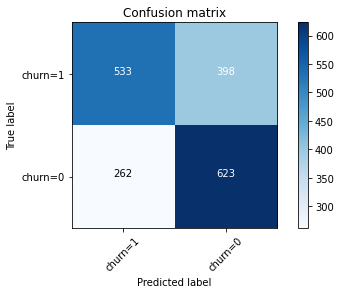

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [65]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.61      0.70      0.65       885
           1       0.67      0.57      0.62       931

    accuracy                           0.64      1816
   macro avg       0.64      0.64      0.64      1816
weighted avg       0.64      0.64      0.64      1816



In [66]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.635724433876875

La precisión sigue dando 64%

Se concluye que el score B puede predecir un poco mejor que el score A bajo un modelo de regresión logístico según los pindices de Jaccard y la matriz de confusión y sus métricas asociadas.